# Thompson Sampling

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [4]:
import random
number_of_rounds = len(dataset)
number_of_ads = len(dataset.columns)
ads_selected = []
numbers_of_rewards_1 = [0] * number_of_ads
numbers_of_rewards_0 = [0] * number_of_ads
total_reward = 0

In [7]:
for n in range(number_of_rounds):
    max_sample = 0
    ad = 0
    for i in range(number_of_ads):
        # step 2: take a random sample from beta(a, b)
        sample = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if max_sample < sample:
            max_sample = sample
            ad = i
    ads_selected.append(ad)
    reward = dataset.iloc[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward
        

## Visualising the results - Histogram

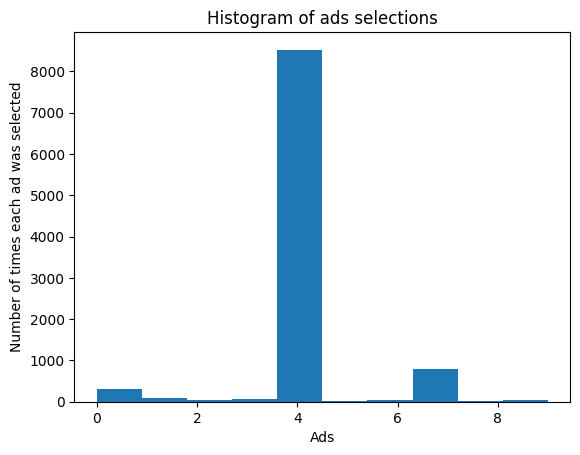

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()